In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\Users\aryku\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv("train.csv")
categorical_vars = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
train = train.drop(columns=categorical_vars)

# Split the dataset into training and testing sets
test_data, train_data = train[:800], train[800:]

# Separate input features (X) and target variable (y) for training dataset
X_train = train_data.drop(columns=['y', 'ID'])  # Drop target variable and non-predictive variables
y_train = train_data['y']  # Target variable

# Separate input features (X) and target variable (y) for testing dataset
X_test = test_data.drop(columns=['y', 'ID'])  # Drop target variable and non-predictive variables
y_test = test_data['y']  # Target variable

In [3]:
features_train = X_train
input_dim = features_train.shape[1]
print("Number of input features:", input_dim)

Number of input features: 368


In [4]:
# Define the model
model = Sequential()

# Add input layer
model.add(Dense(64, input_dim=input_dim, activation='relu'))

# Add first hidden layer
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy'])

# Print model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                23616     
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 24145 (94.32 KB)
Trainable params: 24145 (94.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100


86/86 [==============================] - 1s 4ms/step - loss: 7730.9424 - accuracy: 0.0000e+00 - val_loss: 2858.3750 - val_accuracy: 0.0000e+00
Epoch 2/100
86/86 [==============================] - 0s 2ms/step - loss: 780.5728 - accuracy: 0.0000e+00 - val_loss: 232.6961 - val_accuracy: 0.0000e+00
Epoch 3/100
86/86 [==============================] - 0s 2ms/step - loss: 224.2402 - accuracy: 0.0000e+00 - val_loss: 161.5693 - val_accuracy: 0.0000e+00
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 169.0923 - accuracy: 0.0000e+00 - val_loss: 112.7398 - val_accuracy: 0.0000e+00
Epoch 5/100
86/86 [==============================] - 0s 2ms/step - loss: 130.8737 - accuracy: 0.0000e+00 - val_loss: 83.1112 - val_accuracy: 0.0000e+00
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 108.7428 - accuracy: 0.0000e+00 - val_loss: 70.8788 - val_accuracy: 0.0000e+00
Epoch 7/100
86/86 [==============================] - 0s 2ms/step - loss: 97.5667

Epoch 52/100
86/86 [==============================] - 0s 2ms/step - loss: 73.1230 - accuracy: 0.0000e+00 - val_loss: 57.5736 - val_accuracy: 0.0000e+00
Epoch 53/100
86/86 [==============================] - 0s 2ms/step - loss: 72.7429 - accuracy: 0.0000e+00 - val_loss: 51.7692 - val_accuracy: 0.0000e+00
Epoch 54/100
86/86 [==============================] - 0s 2ms/step - loss: 72.4726 - accuracy: 0.0000e+00 - val_loss: 54.2772 - val_accuracy: 0.0000e+00
Epoch 55/100
86/86 [==============================] - 0s 3ms/step - loss: 72.1764 - accuracy: 0.0000e+00 - val_loss: 75.9808 - val_accuracy: 0.0000e+00
Epoch 56/100
86/86 [==============================] - 0s 3ms/step - loss: 72.6075 - accuracy: 0.0000e+00 - val_loss: 61.2554 - val_accuracy: 0.0000e+00
Epoch 57/100
86/86 [==============================] - 0s 3ms/step - loss: 72.1950 - accuracy: 0.0000e+00 - val_loss: 52.6544 - val_accuracy: 0.0000e+00
Epoch 58/100
86/86 [==============================] - 0s 3ms/step - loss: 71.2196 - accu

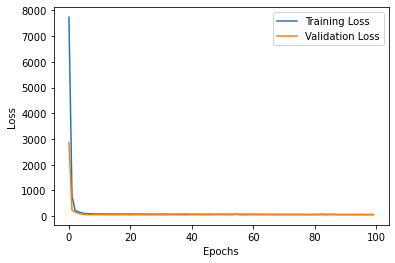

In [5]:
# Split the dataset into input features (X) and target variable (y)
#X_train = train.drop(columns=['y', 'ID'])  # Drop target variable and non-predictive variables
#y_train = train['y']  # Target variable

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

25/25 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 9.138978837702254
R-squared (R²): 0.4571767277966843
